In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
df

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [2]:
test =pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')
test

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813
...,...,...,...,...,...,...
1495,11.755466,5.583147,325.069957,0.170644,388400,13.210917
1496,12.220137,4.023177,439.975574,0.163958,195305,13.819358
1497,1.611053,7.864930,65.025106,0.430021,307856,47.369083
1498,7.114131,5.532188,391.178342,0.150117,51590,12.447761


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clr_rf = RandomForestClassifier()
parametrs = {'n_estimators':[i for i in range(1,16)],
            'max_depth':[i for i in range(1,16)]}

grid_search_cv = GridSearchCV(clr_rf,parametrs)

In [4]:
X = df.drop("class",axis= 1)
X

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...
495,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [5]:
y = pd.get_dummies(df['class'])
y

,cruiser,fighter,transport
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
495,0,1,0
496,0,0,1
497,0,1,0
498,0,1,0


In [6]:
grid_search_cv.fit(X,y)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15]})

In [7]:
best_rf = grid_search_cv.best_estimator_
best_rf.fit(X,y)


RandomForestClassifier(max_depth=2, n_estimators=5, random_state=0)

In [8]:
y_predict = best_rf.predict(test)

y_predict

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [9]:
np.array([i for i in y_predict[:,2:3]])

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=uint8)

In [10]:
list(y)

['cruiser', 'fighter', 'transport']

In [14]:
my_result = pd.Series({list(y)[0]:sum([sum(i) for i in y_predict[:,:1]]),
                          list(y)[1]:sum([sum(i) for i in y_predict[:,1:2]]),
                          list(y)[2]:sum([sum(i) for i in y_predict[:,2:3]])})

my_result

cruiser      230
fighter      675
transport    595
dtype: int32

In [15]:
best_rf.feature_importances_

array([0.12577574, 0.09178134, 0.05825351, 0.56605295, 0.        ,
       0.15813645])

In [16]:
feach = pd.DataFrame({'name_objects':list(test),
                      'fech': best_rf.feature_importances_})

feach


,name_objects,fech
0,g_reflection,0.125776
1,i_reflection,0.091781
2,speed,0.058254
3,brightness,0.566053
4,time_of_observance,0.000000
5,volume,0.158136


<AxesSubplot:xlabel='fech', ylabel='name_objects'>

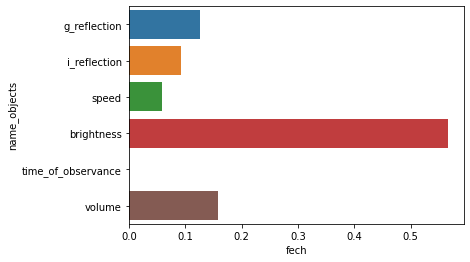

In [18]:
import seaborn as sns

sns.barplot(x = 'fech', y = 'name_objects', data = feach)
